In [ ]:
# Run if dependencies are not installed
# !pip3 install -r torch datasets av

In [ ]:
!pip3 install matplotlib

In [2]:
%matplotlib inline

import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np

from egowalk_dataset.datasets.trajectory.trajectory import EgoWalkTrajectory
from egowalk_dataset.misc.constants import DEFAULT_DATA_PATH
from egowalk_dataset.datasets.base.download import download_dataset

In [3]:
download_dataset(download_rgb=True,
                 download_depth=True,
                 trajectories=["2024_08_15__19_55_49",
                               "2024_12_10__20_17_45"])

Fetching 721 files:   0%|          | 0/721 [00:00<?, ?it/s]

In [4]:
TRAJ_NAMES = sorted([e.stem for e in (DEFAULT_DATA_PATH / "data").glob("*.parquet")])

In [5]:
traj_name = np.random.choice(TRAJ_NAMES)

### Standard example

2025_01_25__15_25_35
Height: 1.21


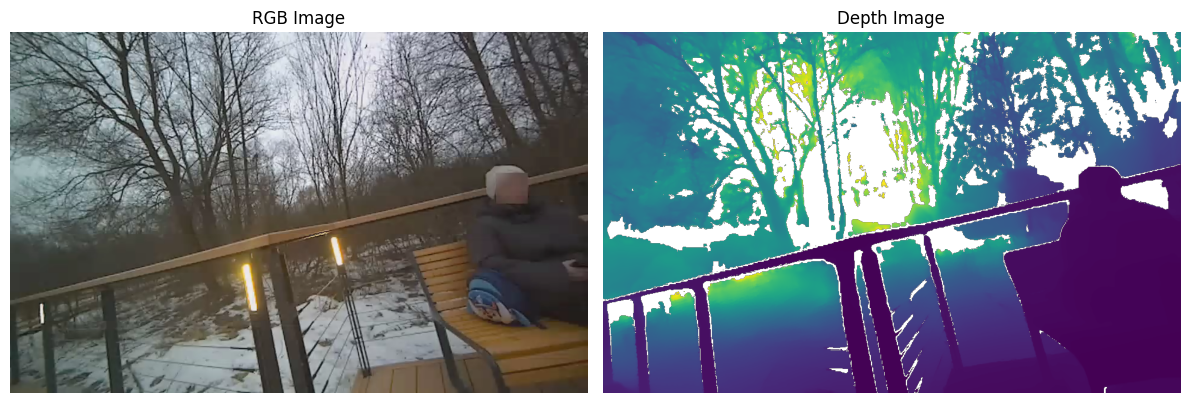

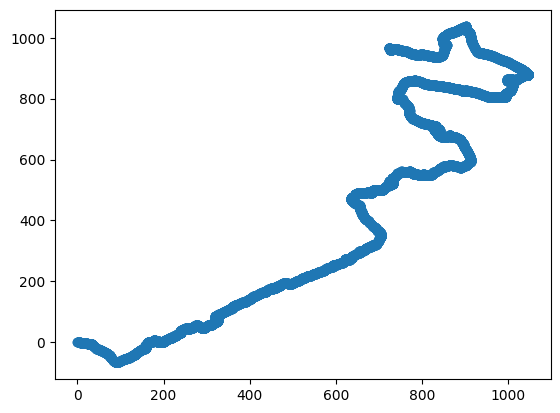

In [5]:
traj = EgoWalkTrajectory.from_dataset(name=traj_name,
                                      keep_video_open=False)

idx = np.random.randint(0, len(traj.rgb))
img_rgb = traj.rgb[idx]
img_depth = traj.depth[idx]
height = traj.camera_height

print(traj_name)
print(f"Height: {height}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb)
axes[0].set_title('RGB Image')
axes[0].axis('off')  # Turn off axes values
axes[1].imshow(img_depth)
axes[1].set_title('Depth Image')
axes[1].axis('off')  # Turn off axes values
plt.tight_layout()
plt.show()

odom_traj = traj.odometry.get_bev(filter_valid=True)
plt.scatter(odom_traj[:, 0], odom_traj[:, 1])
plt.show()

traj.close()


### Detailed timestamps check

In [6]:
valid_ts = traj.odometry.valid_timestamps
all_ts = traj.odometry.all_timestamps

if np.allclose(valid_ts, all_ts):
    print("All timestamps are valid")
else:
    print("Some timestamps are invalid - odometry has missing poses (it's ok, odometry is imperfect by its nature)")




All timestamps are valid


### Optimized connection for multiple frames query

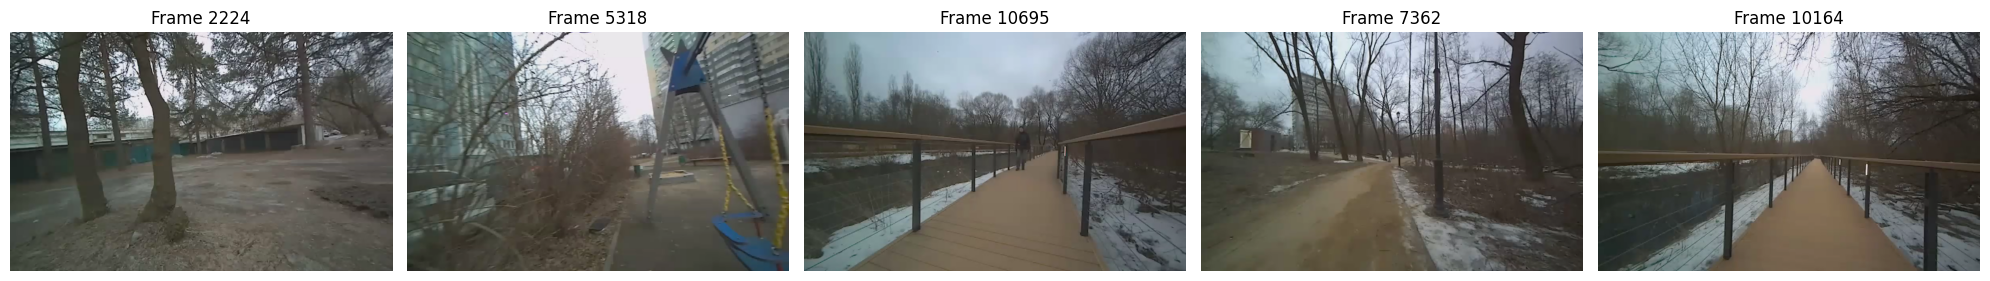

In [7]:
traj = EgoWalkTrajectory.from_dataset(name=traj_name,
                                      keep_video_open=True)

idxs = np.random.randint(0, len(traj.rgb), size=(5,))
images = [traj.rgb[int(i)] for i in idxs]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, (ax, img) in enumerate(zip(axes, images)):
    ax.imshow(img)
    ax.set_title(f'Frame {idxs[i]}')
    ax.axis('off')  # Turn off axes values

plt.tight_layout()
plt.show()

traj.close()